In [18]:
import networkx as nx
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import collections
%matplotlib inline

In [3]:
# Load graph into networkx (weighted, undirected)
df = pd.read_csv('data/reddit_nodes_weighted_full.csv', header=None, names=['source', 'target', 'weight'])
G = nx.from_pandas_edgelist(df, edge_attr='weight', create_using=nx.Graph())

In [7]:
print("Number of Nodes:", len(G.nodes()))
print("Number of Edges:", len(G.edges()))

Number of Nodes: 67180
Number of Edges: 309667


In [8]:
# Load nodes mapping
nodes_mapping = np.load('data/nodes_mapping.npy', allow_pickle = True)
nodes_mapping = nodes_mapping.item()

In [9]:
reverse_nodes_mapping = dict(map(reversed, nodes_mapping.items()))
np.save('data/reverse_nodes_mapping.npy', reverse_nodes_mapping)

In [10]:
# run PageRank
pagerank = nx.pagerank(G)

In [11]:
subreddit_pagerank_dict = {}
for node_id, pr_val in pagerank.items():
    subreddit = reverse_nodes_mapping[node_id]
    subreddit_pagerank_dict[subreddit] = pr_val

In [12]:
sorted_pagerank = dict( sorted(subreddit_pagerank_dict.items(), key=operator.itemgetter(1),reverse=True))
sorted_pagerank

{'askreddit': 0.013693235966451745,
 'subredditdrama': 0.009933135439398704,
 'bestof': 0.008180385079773192,
 'iama': 0.007536189728407419,
 'pics': 0.006857127033814654,
 'funny': 0.0060001128184562665,
 'todayilearned': 0.005210229127392263,
 'videos': 0.005085378846835934,
 'titlegore': 0.005083441734271748,
 'writingprompts': 0.004540846892415267,
 'worldnews': 0.004103738837489467,
 'gaming': 0.0037472707170271677,
 'shitredditsays': 0.0032787856545605245,
 'news': 0.003261824181590324,
 'shitpost': 0.0030074196890169094,
 'drama': 0.00295880139647971,
 'circlebroke2': 0.0028708515347130627,
 'switcharoo': 0.002866249051445603,
 'wtf': 0.002828666131559439,
 'leagueoflegends': 0.0028165979020123313,
 'gifs': 0.0027654006856325008,
 'adviceanimals': 0.0027073533714420863,
 'hailcorporate': 0.0025903046908956,
 'bitcoin': 0.002589409942802439,
 'politics': 0.0025441868594766486,
 'shitamericanssay': 0.0025097702461559196,
 'the_donald': 0.002465981479679237,
 'science': 0.002323260

In [13]:
np.save('data/subreddit_pagerank.npy', sorted_pagerank)

In [14]:
nx.number_connected_components(G)

712

In [15]:
connected_comp_sizes = []
for comp in nx.connected_components(G):
    connected_comp_sizes.append(len(comp))
connected_comp_sizes = sorted(connected_comp_sizes, reverse = True)
connected_comp_sizes

[65648,
 9,
 8,
 7,
 7,
 6,
 6,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


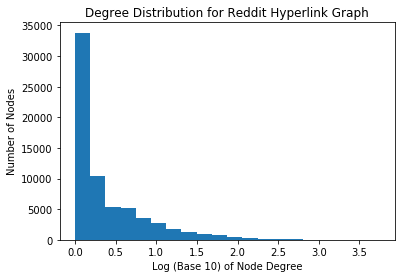

In [31]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
log_degree_sequence = np.log10(degree_sequence)
plt.hist(log_degree_sequence, bins = 20)
plt.title("Degree Distribution for Reddit Hyperlink Graph")
plt.xlabel("Log (Base 10) of Node Degree")
plt.ylabel("Number of Nodes")
plt.savefig("results/deg_dist.png")

In [39]:
list(G.nodes)[6]

72627

In [41]:
len(list(G.neighbors(72627)))

33

In [43]:
G.degree[72627]

33